In [2]:
import torch
import torchaudio
import math
import os
import matplotlib.pyplot as plt

In [9]:
# Given a path, this func gives us the samples from the audio
# Also gives us an option for resampling our data
def _get_sample(path, resample=None):
    effects = [["remix","1"]]
    if resample:
        effects.extend([
           ["lowpass", f"{resample // 2}"],
           ["rate", f"{resample}"]
       ])
    return torchaudio.sox_effects.apply_effects_file(path, effects=effects)


# Calling the above method
def get_sample(path, resample=None):
    return _get_sample(path, resample=resample)


# Same method for getting samples from speech data
def get_speech_sample(path, resample=None):
    return _get_sample(path, resample=resample)


# Plotting waveforms of the audio data
def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None, ylim=None):
    waveform = waveform.numpy()
    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
        if xlim:
            axes[c].set_xlim(xlim)
        if ylim:
            axes[c].set_ylim(ylim)
    figure.suptitle(title)
    plt.show(block=False)


# Printing a description for the audio file
def print_stats(waveform, sample_rate=None, src=None):
    if src:
        print("-"*10)
        print(f"Source: {src}")
        print("-"*10)
    if sample_rate:
        print(f"Sample Rate: {sample_rate}")
    print("Dtype:", waveform.dtype)
    print(f" - Max:     {waveform.max().item():6.3f}")
    print(f" - Min:     {waveform.min().item():6.3f}")
    print(f" - Mean:    {waveform.mean().item():6.3f}")
    print(f" - Std Dev: {waveform.std().item():6.3f}")
    print()
    print(waveform)
    print()



# Plotting the spectrogram of the audio files
def plot_specgram(waveform, sample_rate, title="Spectrogram", xlim=None):
    waveform = waveform.numpy()
    num_channels, num_frames = waveform.shape
    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
        if xlim:
            axes[c].set_xlim(xlim)
    figure.suptitle(title)
    plt.show(block=False)


In [10]:
wf, sr = get_speech_sample('/home/lski-029/Music/dummy/chunk0.wav', resample=None)

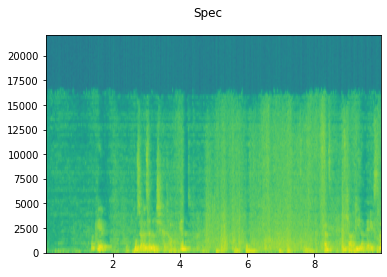

In [12]:
plot_specgram(wf, sr, "Spec")